In [1]:
import sys
sys.path.insert(0, '../')

import data_preparation as dp
import rnn_model as rnn

import numpy as np
import pandas as pd
import tensorflow as tf
import random as rn
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [3]:
sentiment_data = dp.data_loader('../../data/stanfordSentimentTreebank/')
sentiment_data = dp.data_preprocessor(sentiment_data)

In [4]:
# Train and evaluate the model for each of the text columns
columns = ['tokenized_text', 'no_punctuation_text', 'no_stopwords_text', 'stemmed_text', 'lemmatized_text']
results = []
for column in columns:
    model_result = rnn.train_and_evaluate(sentiment_data, column)
    results.append(model_result)

results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=columns)

Epoch 1/20
254/254 [==============================] - 34s 115ms/step - loss: 4.1435 - categorical_accuracy: 0.2463 - val_loss: 2.9009 - val_categorical_accuracy: 0.1916
Epoch 2/20
254/254 [==============================] - 28s 108ms/step - loss: 2.4173 - categorical_accuracy: 0.3142 - val_loss: 2.1890 - val_categorical_accuracy: 0.2481
Epoch 3/20
254/254 [==============================] - 29s 115ms/step - loss: 1.7490 - categorical_accuracy: 0.4061 - val_loss: 1.6869 - val_categorical_accuracy: 0.3630
Epoch 4/20
254/254 [==============================] - 29s 116ms/step - loss: 1.3765 - categorical_accuracy: 0.5098 - val_loss: 2.1867 - val_categorical_accuracy: 0.3161
Epoch 5/20
254/254 [==============================] - 30s 118ms/step - loss: 1.1258 - categorical_accuracy: 0.6076 - val_loss: 1.9976 - val_categorical_accuracy: 0.3065
Epoch 6/20
254/254 [==============================] - 30s 119ms/step - loss: 0.9493 - categorical_accuracy: 0.6792 - val_loss: 2.0326 - val_categorical_acc

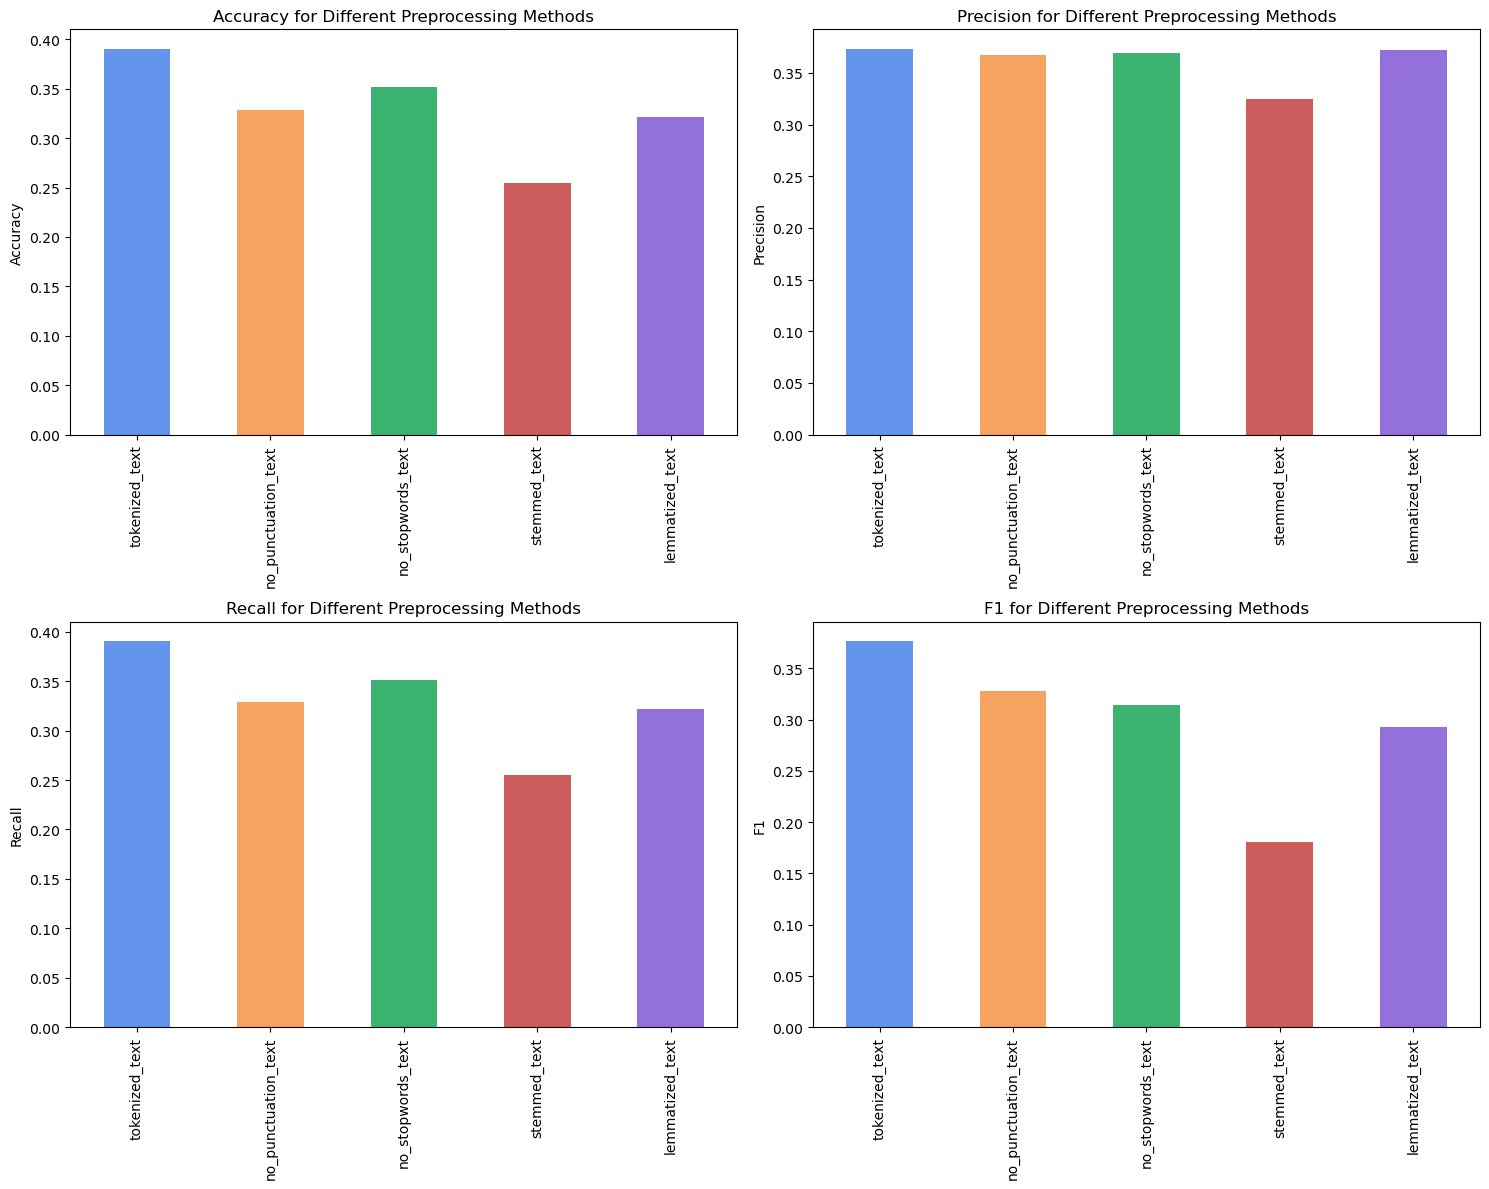

In [5]:
# Create a list of colors
colors = ['cornflowerblue', 'sandybrown', 'mediumseagreen', 'indianred', 'mediumpurple']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Plot Accuracy
results_df['Accuracy'].plot(kind='bar', ax=axes[0, 0], color=colors)
axes[0, 0].set_title('Accuracy for Different Preprocessing Methods')
axes[0, 0].set_ylabel('Accuracy')

# Plot Precision
results_df['Precision'].plot(kind='bar', ax=axes[0, 1], color=colors)
axes[0, 1].set_title('Precision for Different Preprocessing Methods')
axes[0, 1].set_ylabel('Precision')

# Plot Recall
results_df['Recall'].plot(kind='bar', ax=axes[1, 0], color=colors)
axes[1, 0].set_title('Recall for Different Preprocessing Methods')
axes[1, 0].set_ylabel('Recall')

# Plot F1
results_df['F1'].plot(kind='bar', ax=axes[1, 1], color=colors)
axes[1, 1].set_title('F1 for Different Preprocessing Methods')
axes[1, 1].set_ylabel('F1')

plt.tight_layout()
plt.show()